In [87]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)
np.random.seed(0)

In [88]:
# Single signal datasets

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
singlets_target = mask
singlets = np.array([1, 0, 0, 0, 0, 0]) * mask.repeat(6).reshape(10, 21, 6)

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
doublets_target = mask * 2
doublets = np.array([1, 1, 0, 0, 0, 0]) * mask.repeat(6).reshape(10, 21, 6)

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
triplets_target = mask * 3
triplets = np.array([1, 2, 1, 0, 0, 0]) * mask.repeat(6).reshape(10, 21, 6)

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
quartets_target = mask * 4
quartets = np.array([1, 3, 3, 1, 0, 0]) * mask.repeat(6).reshape(10, 21, 6)

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
quintets_target = mask * 5
quintets = np.array([1, 4, 6, 4, 1, 0]) * mask.repeat(6).reshape(10, 21, 6)

mask = np.random.binomial(1, 1-0.6, size=(10, 21))
sextets_target = mask * 6
sextets = np.array([1, 4, 6, 4, 1, 0]) * mask.repeat(6).reshape(10, 21, 6)
print(np.shape(sextets))
print(np.shape(sextets_target))

(10, 21, 6)
(10, 21)


In [89]:
# Single compound dataset with doubling

multiplets = np.array((np.array([1, 0, 0, 0, 0, 0]),
                       np.array([1, 1, 0, 0, 0, 0]),
                       np.array([1, 2, 1, 0, 0, 0]),
                       np.array([1, 3, 3, 1, 0, 0]),
                       np.array([1, 4, 6, 4, 1, 0]),
                       np.array([1, 3, 6, 6, 3, 1])))

singles = multiplets[np.random.randint(0, 6, size=(10, 21))] * np.random.binomial(1, 1-0.9, size=(10, 21)).repeat(6).reshape(10, 21, 6) + multiplets[np.random.randint(0, 6, size=(10, 21))] * np.random.binomial(1, 1-0.9, size=(10, 21)).repeat(6).reshape(10, 21, 6)
print(singles[0])

singles_target = torch.tensor(np.arange(0, 10))
print(singles_target)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 3 6 6 3 1]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [90]:
# Mixed compound dataset

mixed = np.array(([singles[0] + singles[2] + singles[2],
                   singles[4] + singles[6] + singles[1],
                   singles[1] + singles[0] + singles[8],
                   singles[7] + singles[9] + singles[8],
                   singles[5] + singles[5] + singles[3],
                   singles[0] + singles[1] + singles[2],
                   singles[6] + singles[8] + singles[3],
                   singles[3] + singles[6] + singles[9],
                   singles[0] + singles[2] + singles[1],
                   singles[4] + singles[5] + singles[6]]))
print(np.shape(mixed))
print(mixed[0])
mixed = torch.from_numpy(mixed).float()

mixed_targets = np.array(([singles_target[0], singles_target[2], singles_target[2]],
                          [singles_target[4], singles_target[6], singles_target[1]],
                          [singles_target[1], singles_target[0], singles_target[8]],
                          [singles_target[7], singles_target[9], singles_target[8]],
                          [singles_target[5], singles_target[5], singles_target[3]],
                          [singles_target[0], singles_target[1], singles_target[2]],
                          [singles_target[6], singles_target[8], singles_target[3]],
                          [singles_target[3], singles_target[6], singles_target[9]],
                          [singles_target[0], singles_target[2], singles_target[1]],
                          [singles_target[4], singles_target[5], singles_target[6]]))
print(mixed_targets)
mixed_targets = torch.from_numpy(mixed_targets).long()

mixed_test = np.array(([singles[1] + singles[2] + singles[1],
                        singles[3] + singles[3] + singles[3],
                        singles[4] + singles[3] + singles[4],
                        singles[5] + singles[2] + singles[3],
                        singles[2] + singles[8] + singles[7],
                        singles[7] + singles[0] + singles[8],
                        singles[6] + singles[9] + singles[3],
                        singles[0] + singles[3] + singles[4],
                        singles[1] + singles[4] + singles[5],
                        singles[1] + singles[2] + singles[6]]))
print(mixed_test[0])
mixed_test = torch.from_numpy(mixed_test).float()

mixed_test_targets = np.array(([singles_target[1], singles_target[2], singles_target[1]],
                               [singles_target[3], singles_target[3], singles_target[3]],
                               [singles_target[4], singles_target[3], singles_target[4]],
                               [singles_target[5], singles_target[2], singles_target[3]],
                               [singles_target[2], singles_target[8], singles_target[7]],
                               [singles_target[7], singles_target[0], singles_target[8]],
                               [singles_target[6], singles_target[9], singles_target[3]],
                               [singles_target[0], singles_target[3], singles_target[4]],
                               [singles_target[1], singles_target[4], singles_target[5]],
                               [singles_target[1], singles_target[2],  singles_target[6]]))
print(mixed_test_targets)
mixed_test_targets = torch.from_numpy(mixed_test_targets).float()

(10, 21, 6)
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  8 12  8  2  0]
 [ 0  0  0  0  0  0]
 [ 3  8 12  8  2  0]
 [ 1  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  4  2  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  3  6  6  3  1]
 [ 2  2  0  0  0  0]
 [ 2  6 12 12  6  2]
 [ 2  0  0  0  0  0]
 [ 2  8 12  8  2  0]
 [ 2  4  2  0  0  0]
 [ 4  4  2  0  0  0]
 [ 2  0  0  0  0  0]]
[[0 2 2]
 [4 6 1]
 [1 0 8]
 [7 9 8]
 [5 5 3]
 [0 1 2]
 [6 8 3]
 [3 6 9]
 [0 2 1]
 [4 5 6]]
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  4  6  4  1  0]
 [ 0  0  0  0  0  0]
 [ 1  4  6  4  1  0]
 [ 0  0  0  0  0  0]
 [ 4  4  2  0  0  0]
 [ 0  0  0  0  0  0]
 [ 4  4  2  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 1  3  6  6  3  1]
 [ 3  8 12  8  2  0]
 [ 1  4  6  4  1  0]
 [ 1  2  1  0  0  0]
 [ 4  8 13 12  6  2]
 [ 1  0  0  0  0  0]]
[[1 2 1]
 [3 

In [91]:
class DepthConv(nn.Module):
    def __init__(self, input, hidden, kernel, padding, dilation):
        super(DepthConv, self).__init__()

        self.conv = nn.Conv1d(input, hidden, 1)
        self.dconv = nn.Conv1d(hidden, hidden, kernel, dilation=dilation, groups=hidden, padding=padding)
        self.activation1 = nn.PReLU()
        self.activation2 = nn.PReLU()
        self.normalization1 = nn.GroupNorm(1, hidden)
        self.normalization2 = nn.GroupNorm(1, hidden)
        self.skip_out = nn.Conv1d(hidden, input, 1)
        self.residual_out = nn.Conv1d(hidden, input, 1)

    def forward(self, x):
        x = self.normalization1(self.activation1(self.conv(x)))
        x = self.normalization2(self.activation2(self.dconv(x)))
        skip = self.skip_out(x)
        residual = self.residual_out(x)
        return skip, residual

class TCN(nn.Module):
    def __init__(self, input, BN, stacks, layers, kernel, num):
        super(TCN, self).__init__()

        # Input is a sequence of features of shape (B, N, L)
        self.LN = nn.GroupNorm(1, input)
        self.BN = nn.Conv1d(input, BN, 1)

        # TCN for feature extraction
        self.TCN = nn.ModuleList([])
        for s in range(stacks):
            for l in range(layers):
                self.TCN.append(DepthConv(BN, BN*4, kernel, dilation=2**l, padding=2**l))

        # Output
        self.output = nn.Sequential(nn.PReLU(),
                                    nn.Conv1d(BN, input*num, 1))

    def forward(self, x):
        x = self.BN(self.LN(x))

        connection = 0
        for i in range(len(self.TCN)):
            skip, residual = self.TCN[i](x)
            connection = connection + skip
            x = x + residual

        return self.output(connection)

class Net(nn.Module):
    def __init__(self, input=64, BN=16, stacks = 3, layers=4, kernel=3, padding=1, num=3, length=21):
        super(Net, self).__init__()

        self.input = input
        self.BN = BN
        self.stacks = stacks
        self.layers = layers
        self.kernel = kernel
        self.padding = padding
        self.num = num
        self.length = length
        self.stride = kernel // 2

        # Encoder
        self.encoder = nn.Conv1d(6, self.input, self.kernel, stride=self.stride, padding=self.padding)

        # Separator
        self.TCN = TCN(self.input, self.BN, self.stacks, self.layers, self.kernel, self.num)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv1d(self.input, 1, self.kernel, padding=padding),
            nn.ReLU(),
            nn.Linear(self.length, 10),
            nn.ReLU(),
            nn.Softmax(dim=2))

    def forward(self, x):
        x = x.reshape(1, 6, 21)
        x = self.encoder(x)
        batch_size = x.size(0)

        masks = torch.sigmoid(self.TCN(x)).view(batch_size, self.num, self.input, -1) # B, C, N, L
        x_masked = x.unsqueeze(1) * masks # B, 1, N, L * B, C, N, L

        out = self.classifier(x_masked.view(self.num, self.input, -1))
        return out.reshape(3, 10)

net = Net()

In [92]:
epochs = 1000

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-2, weight_decay=1e-5)

loss_values = list()
correct = 0
for epoch in range(epochs):
    losses = list()
    net.train()
    for i in range(len(mixed)):
        x, y = mixed[i], mixed_targets[i]
        out = net(x)
        # print('y', y)
        # print('pred', out.clone().detach().argmax(dim=1))
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    loss_values.append(torch.tensor(losses).mean())

    with torch.no_grad():
        net.eval()
        for i in range(len(mixed_test)):
            x, y = mixed_test[i], mixed_test_targets[i]
            out = net(x)
            correct += y.eq(out.detach().argmax(dim=1)).sum()
print(f'SGD training loss: {loss_values[-1]}, accuracy: {correct/(len(mixed_test)*epochs)}')
SGD_loss =  np.array(loss_values)

SGD training loss: 1.5843758583068848, accuracy: 0.4691999852657318


In [93]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-4, momentum=0.99, weight_decay=1e-5)

loss_values = list()
correct = 0
for epoch in range(epochs):
    losses = list()
    net.train()
    for i in range(len(mixed)):
        x, y = mixed[i], mixed_targets[i]
        out = net(x)
        # print('y', y)
        # print('pred', out.clone().detach().argmax(dim=1))
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    loss_values.append(torch.tensor(losses).mean())

    with torch.no_grad():
        net.eval()
        for i in range(len(mixed_test)):
            x, y = mixed_test[i], mixed_test_targets[i]
            out = net(x)
            correct += y.eq(out.detach().argmax(dim=1)).sum()
print(f'SGD with momentum training loss: {loss_values[-1]}, accuracy: {correct/(len(mixed_test)*epochs)}')
SGD_momentum_loss =  np.array(loss_values)

SGD with momentum training loss: 1.6857086420059204, accuracy: 0.44119998812675476


Adam training loss: 1.9723678827285767, accuracy: 0.5235999822616577


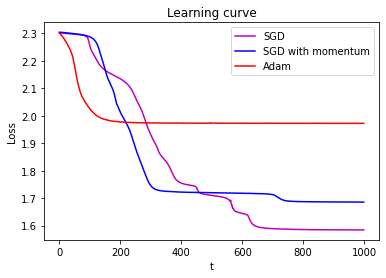

In [94]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)

loss_values = list()
correct = 0
for epoch in range(epochs):
    losses = list()
    net.train()
    for i in range(len(mixed)):
        x, y = mixed[i], mixed_targets[i]
        out = net(x)
        # print('y', y)
        # print('pred', out.clone().detach().argmax(dim=1))
        loss = criterion(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    loss_values.append(torch.tensor(losses).mean())

    with torch.no_grad():
        net.eval()
        for i in range(len(mixed_test)):
            x, y = mixed_test[i], mixed_test_targets[i]
            out = net(x)
            correct += y.eq(out.detach().argmax(dim=1)).sum()
print(f'Adam training loss: {loss_values[-1]}, accuracy: {correct/(len(mixed_test)*epochs)}')
Adam_loss =  np.array(loss_values)

t = np.arange(0, epochs)
plt.plot(t, SGD_loss, 'm', label="SGD")
plt.plot(t, SGD_momentum_loss, 'b', label="SGD with momentum")
plt.plot(t, Adam_loss, 'r', label="Adam")
plt.xlabel('t')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.legend()
plt.savefig('learning_curve.png')
plt.show()